In [33]:
import pandas as pd
import numpy as np

In [34]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100000, n_features=20, n_informative=15, n_redundant=5, random_state=0)

In [35]:
accuracy = {}
speed = {}

## Scikit-Learn

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
# Test for different functions in sklearn
# do hyperparameter tuning

In [37]:
model = GradientBoostingClassifier(max_depth=4)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=0)
#score = cross_val_score(model, X, y, scoring="accuracy", cv = cv,n_jobs=-1)

accuracy["GradientBoostingdepth_4"] = np.mean(score).round(3)

In [38]:
model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

## Alternative

In [39]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

In [65]:
model = HistGradientBoostingClassifier()

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=0)
score = cross_val_score(model, X, y, scoring="accuracy", cv = cv, n_jobs=-1)

accuracy["HistGradientBoosting"] = np.mean(score).round(3)

In [66]:
accuracy

{'XGBClassifier10000accuracy': 0.9567,
 'LGBMClassifier10000accuracy': 0.9567,
 'GradientBoostingClassifier10000accuracy': 0.9567,
 'HistGradientBoostingClassifier10000accuracy': 0.9567,
 'AdaBoostClassifier10000accuracy': 0.9567,
 'RandomForestClassifier10000accuracy': 0.9567,
 'CatBoostClassifier10000accuracy': 0.9567,
 'XGBClassifier100000accuracy': 0.9755,
 'LGBMClassifier100000accuracy': 0.9755,
 'GradientBoostingClassifier100000accuracy': 0.9755,
 'HistGradientBoostingClassifier100000accuracy': 0.9755,
 'AdaBoostClassifier100000accuracy': 0.9755,
 'RandomForestClassifier100000accuracy': 0.9755,
 'CatBoostClassifier100000accuracy': 0.9755,
 'HistGradientBoosting': 0.948}

## Random Forrest

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
model = RandomForestClassifier()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=0)
#score = cross_val_score(model, X, y, scoring="accuracy", cv = cv, n_jobs=-1)

accuracy["RandomForrest"] = np.mean(score).round(3)

## AdaBoost

In [44]:
from sklearn.ensemble import AdaBoostClassifier

In [45]:
model = AdaBoostClassifier(n_estimators=200)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=0)
#score = cross_val_score(model, X, y, scoring="accuracy", cv = cv, n_jobs=-1)

accuracy["AdaBoost_200_estimators"] = np.mean(score).round(3)

In [46]:
#TODO: hyperparameter tuning with mlflow and xgboost

## XGBoost

In [47]:
!pip install xgboost
from xgboost import XGBClassifier

In [48]:
model = XGBClassifier()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=0)
#score = cross_val_score(model, X, y, scoring="accuracy", cv = cv, n_jobs=-1)

accuracy["XGBoost"] = np.mean(score).round(3)

## LightGBM

In [49]:
!pip install catboost

In [50]:
from lightgbm import LGBMClassifier

In [51]:
model = XGBClassifier()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=0)
#score = cross_val_score(model, X, y, scoring="accuracy", cv = cv, n_jobs=-1)

accuracy["LightGBM"] = np.mean(score).round(3)

In [52]:
from catboost import CatBoostClassifier


In [68]:
accuracy = {}
speed = {}

In [54]:
from time import time
from tqdm import tqdm


In [67]:
model

HistGradientBoostingClassifier()

In [69]:
#iterate through sample sizes 
for sample_size in tqdm([10_000, 100_000, 1_000_000], desc="Sample Size"):
	X, y = make_classification(n_samples=sample_size, n_features=20, n_informative=15, n_redundant=5, random_state=0)
	#iterate through the models
	models = [XGBClassifier, LGBMClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier, CatBoostClassifier]
	for mod in models:
		print("Currently working with: " + str(sample_size) + " and model: " + mod.__name__)
		models = mod()
		start = time()
		cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=0)
		score = cross_val_score(models, X, y, scoring="accuracy", cv = cv, n_jobs=-1)	
		print(type(score))
		speed[mod.__name__ + str(sample_size) + "speed"] = np.round(time() - start, 4)
		accuracy[mod.__name__ + str(sample_size) + "accuracy"] = np.mean(score).round(4)
		print(score)


Sample Size:   0%|          | 0/3 [00:00<?, ?it/s]

Currently working with: 10000 and model: XGBClassifier
<class 'numpy.ndarray'>
[0.9575 0.96   0.951  0.962  0.954  0.9615 0.9445 0.9565 0.9595 0.9605]
Currently working with: 10000 and model: LGBMClassifier
<class 'numpy.ndarray'>
[0.9505 0.9485 0.9495 0.955  0.939  0.9475 0.938  0.9455 0.9505 0.9525]
Currently working with: 10000 and model: GradientBoostingClassifier
<class 'numpy.ndarray'>
[0.8765 0.87   0.874  0.882  0.8845 0.872  0.868  0.8865 0.8875 0.883 ]
Currently working with: 10000 and model: HistGradientBoostingClassifier
<class 'numpy.ndarray'>
[0.955  0.947  0.946  0.953  0.945  0.9445 0.94   0.9455 0.9525 0.953 ]
Currently working with: 10000 and model: AdaBoostClassifier
<class 'numpy.ndarray'>
[0.763  0.7535 0.747  0.7755 0.7775 0.756  0.753  0.764  0.757  0.7715]
Currently working with: 10000 and model: RandomForestClassifier
<class 'numpy.ndarray'>
[0.952  0.942  0.9455 0.945  0.9425 0.948  0.9385 0.943  0.9395 0.948 ]
Currently working with: 10000 and model: CatBoost

Sample Size:  33%|███▎      | 1/3 [01:13<02:26, 73.33s/it]

<class 'numpy.ndarray'>
[0.966  0.967  0.9585 0.9665 0.9575 0.9625 0.9615 0.9605 0.9695 0.9685]
Currently working with: 100000 and model: XGBClassifier
<class 'numpy.ndarray'>
[0.97375 0.9746  0.9756  0.97555 0.9782  0.97585 0.9742  0.97795 0.9749
 0.97465]
Currently working with: 100000 and model: LGBMClassifier
<class 'numpy.ndarray'>
[0.9621  0.96095 0.96555 0.9639  0.9637  0.96325 0.96215 0.96555 0.96255
 0.9628 ]
Currently working with: 100000 and model: GradientBoostingClassifier
<class 'numpy.ndarray'>
[0.89125 0.8951  0.89565 0.89615 0.8905  0.9003  0.88935 0.8967  0.89125
 0.89515]
Currently working with: 100000 and model: HistGradientBoostingClassifier
<class 'numpy.ndarray'>
[0.9601  0.963   0.9641  0.96145 0.9631  0.96205 0.9617  0.964   0.96085
 0.9657 ]
Currently working with: 100000 and model: AdaBoostClassifier
<class 'numpy.ndarray'>
[0.7532  0.75585 0.76125 0.7604  0.7526  0.7553  0.7535  0.7561  0.7524
 0.7587 ]
Currently working with: 100000 and model: RandomForestC

Sample Size:  67%|██████▋   | 2/3 [07:43<04:19, 259.99s/it]

<class 'numpy.ndarray'>
[0.9807  0.9821  0.98265 0.98405 0.9858  0.98375 0.9823  0.98425 0.98185
 0.9817 ]
Currently working with: 1000000 and model: XGBClassifier
<class 'numpy.ndarray'>
[0.9784   0.978855 0.97892  0.978095 0.978685 0.97923  0.97814  0.97888
 0.978245 0.978545]
Currently working with: 1000000 and model: LGBMClassifier
<class 'numpy.ndarray'>
[0.96644  0.966155 0.9676   0.9662   0.96718  0.966595 0.96676  0.967045
 0.96689  0.96681 ]
Currently working with: 1000000 and model: GradientBoostingClassifier
<class 'numpy.ndarray'>
[0.921495 0.92266  0.919475 0.924315 0.919605 0.92359  0.92157  0.921195
 0.918825 0.920305]
Currently working with: 1000000 and model: HistGradientBoostingClassifier
<class 'numpy.ndarray'>
[0.966835 0.96641  0.96742  0.96637  0.966465 0.966335 0.966615 0.966245
 0.96759  0.96648 ]
Currently working with: 1000000 and model: AdaBoostClassifier
<class 'numpy.ndarray'>
[0.78591  0.782315 0.78428  0.783215 0.78218  0.78528  0.78504  0.782065
 0.78244

Sample Size: 100%|██████████| 3/3 [1:17:54<00:00, 1558.30s/it]

<class 'numpy.ndarray'>
[0.985495 0.986005 0.986325 0.986005 0.986545 0.98621  0.986485 0.985955
 0.98628  0.98571 ]


In [71]:
speed

{'XGBClassifier10000speed': 4.121,
 'LGBMClassifier10000speed': 0.9661,
 'GradientBoostingClassifier10000speed': 5.8166,
 'HistGradientBoostingClassifier10000speed': 0.8822,
 'AdaBoostClassifier10000speed': 1.4312,
 'RandomForestClassifier10000speed': 3.0005,
 'CatBoostClassifier10000speed': 57.0893,
 'XGBClassifier100000speed': 40.1914,
 'LGBMClassifier100000speed': 2.916,
 'GradientBoostingClassifier100000speed': 83.9796,
 'HistGradientBoostingClassifier100000speed': 3.7336,
 'AdaBoostClassifier100000speed': 17.6267,
 'RandomForestClassifier100000speed': 44.7983,
 'CatBoostClassifier100000speed': 197.291,
 'XGBClassifier1000000speed': 716.0383,
 'LGBMClassifier1000000speed': 33.7799,
 'GradientBoostingClassifier1000000speed': 1381.823,
 'HistGradientBoostingClassifier1000000speed': 40.6933,
 'AdaBoostClassifier1000000speed': 279.046,
 'RandomForestClassifier1000000speed': 796.1317,
 'CatBoostClassifier1000000speed': 962.3391}

In [77]:
import matplotlib.pyplot as plt
import pandas as pd


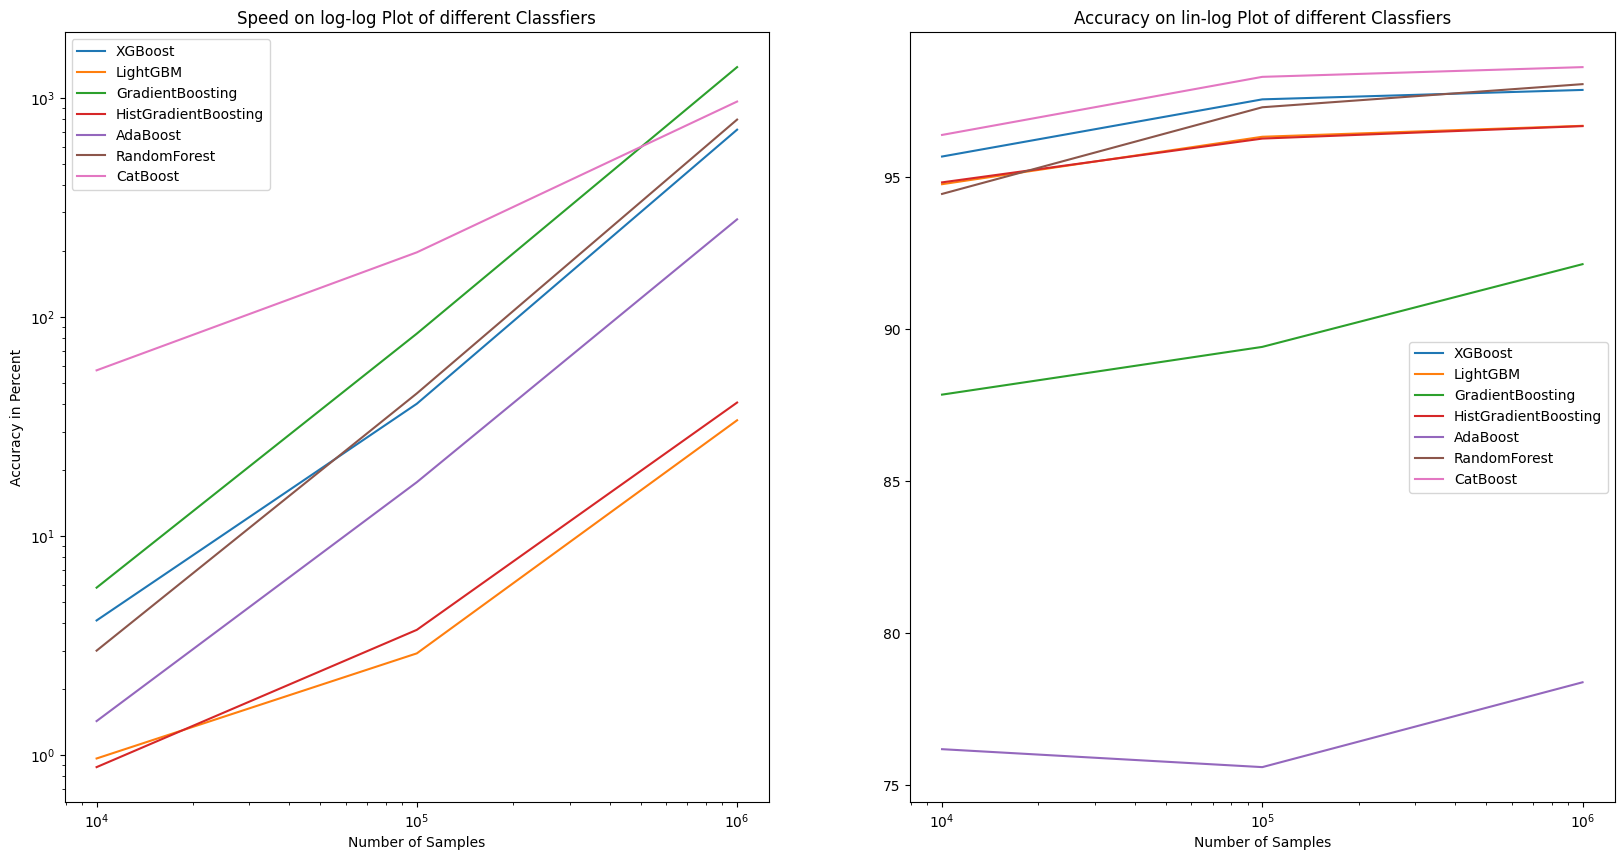

In [115]:
fig, (ax1, ax2) = plt.subplots(1, 2)#, sharex=True, sharey=True)
ax1.set_yscale('log', base=10)
ax1.set_xscale('log', base=10)
ax2.set_xscale('log', base=10)
#ax1.plot([10_000, 100_000, 1_000_000], [speed[0][0], speed[0][7], speed[0][14]])
#ax1.plot([10_000, 100_000, 1_000_000], [speed[0][1], speed[0][8], speed[0][15]])
for i in range(7):
        ax1.plot([10_000, 100_000, 1_000_000], [speed[0][i], speed[0][i + 7], speed[0][i + 14]])
        ax2.plot([10_000, 100_000, 1_000_000], [accuracy[0][i] * 100, accuracy[0][i + 7]* 100, accuracy[0][i + 14]* 100])

ax1.legend(['XGBoost', 'LightGBM', "GradientBoosting", "HistGradientBoosting", "AdaBoost", "RandomForest", "CatBoost"])
ax2.legend(['XGBoost', 'LightGBM', "GradientBoosting", "HistGradientBoosting", "AdaBoost", "RandomForest", "CatBoost"])
fig.set_figheight(10)
fig.set_figwidth(20)
ax1.set_title("Speed on log-log Plot of different Classfiers")
ax2.set_title("Accuracy on lin-log Plot of different Classfiers")
ax1.set_ylabel("Time in Seconds")
ax1.set_ylabel("Accuracy in Percent")
ax1.set_xlabel("Number of Samples")
ax2.set_xlabel("Number of Samples")
plt.savefig("result.png")

In [86]:
speed[0]

XGBClassifier10000speed                          4.1210
LGBMClassifier10000speed                         0.9661
GradientBoostingClassifier10000speed             5.8166
HistGradientBoostingClassifier10000speed         0.8822
AdaBoostClassifier10000speed                     1.4312
RandomForestClassifier10000speed                 3.0005
CatBoostClassifier10000speed                    57.0893
XGBClassifier100000speed                        40.1914
LGBMClassifier100000speed                        2.9160
GradientBoostingClassifier100000speed           83.9796
HistGradientBoostingClassifier100000speed        3.7336
AdaBoostClassifier100000speed                   17.6267
RandomForestClassifier100000speed               44.7983
CatBoostClassifier100000speed                  197.2910
XGBClassifier1000000speed                      716.0383
LGBMClassifier1000000speed                      33.7799
GradientBoostingClassifier1000000speed        1381.8230
HistGradientBoostingClassifier1000000speed      

In [ ]:
import ipywidgets as widgets
from IPython.display import display



In [ ]:
int_slider = widgets.IntSlider(min=10, max=50, value=25, step=2, description="Integer Slider")

int_slider2 = widgets.IntSlider(min=10, max=50, value=25, step=2, description="Integer Sler2")
display(int_slider)
display(int_slider2)


IntSlider(value=25, description='Integer Slider', max=50, min=10, step=2)

IntSlider(value=25, description='Integer Sler2', max=50, min=10, step=2)

In [ ]:
int_slider2.value

46